In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('data/RVO.xlsx')

In [7]:
df.sort_values('Start Time', ascending=True).head()

,Building/Room,Title,Course/Reservation,Subject,Date,Day of Week,Start Time,End Time,Enrolled,Max Enroll,Avg Occupancy,Attend,Normal > 50%
0,Building A 100,Calculus I,MATH 1000 A02,MATH,2023-01-04,Wednesday,09:00:00,10:10:00,16,25,0.625973,0.039123,Low
21,Building A 121,Principles of Wellness,BSHN 5050 F76,BSHN,2023-01-04,Wednesday,09:00:00,09:50:00,27,30,21.350961,0.790776,Normal
7,Building A 107,Methods of Teaching Sec Read,EDU 9000 D23,SECE,2023-01-04,Wednesday,09:00:00,09:50:00,15,18,8.273147,0.551543,Normal
25,Building A 125,Environment and Occ Health,PUBH 3490 G01,BPH,2023-01-04,Wednesday,09:00:00,09:50:00,17,30,21.670459,1.274733,High
2,Building A 102,Anatomy and Physiology II/Lab,BIOL 3000 D01,BIOL,2023-01-04,Wednesday,09:00:00,09:50:00,17,18,13.332544,0.784267,Normal


In [35]:
df.loc[17, ['Enrolled', 'Average', 'Attend']]

Enrolled           5
Average     8.276779
Attend      1.655356
Name: 17, dtype: object

In [36]:
df.apply(pd.Series.min)

Building/Room                 Building A 100
Title                 Advising Staff Meeting
Course/Reservation             BIOL 3000 D01
Subject                                 BIOL
Date                     2023-01-04 00:00:00
Day of Week                        Wednesday
Start Time                          09:00:00
End Time                            09:50:00
Enrolled                                   0
Max Enroll                                 0
Average                             0.419917
Attend                                   0.0
Level                                   High
dtype: object

In [51]:
filt = df['Level'] == 'High'
df_h = df[filt]
df_h['Start Time'].value_counts()

Start Time
11:00:00    3
10:00:00    3
09:00:00    1
Name: count, dtype: int64

In [35]:
df['Attend'] = df['Attend'].apply(lambda x: x * 100)

In [36]:
simple = df[['Title', 'Attend', 'Normal > 50%', 'Start Time']].set_index('Start Time').sort_values(['Start Time', 'Attend'], ascending=[True, False])

In [37]:
simple

,Title,Attend,Normal > 50%
Start Time,,,
09:00:00,Environment and Occ Health,127.473291,High
09:00:00,Principles of Wellness,79.077635,Normal
09:00:00,Anatomy and Physiology II/Lab,78.426729,Normal
09:00:00,Methods of Teaching Sec Read,55.154311,Normal
09:00:00,Calculus I,3.912330,Low
10:00:00,Coaching Diverse Populations,165.535578,High
10:00:00,Introduction to Global Health,111.551945,High
10:00:00,Latino Identities,103.290542,High
10:00:00,Community Health,77.469584,Normal


In [63]:
# In [7]: df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
# In [8]: df = df.cumsum()
# In [9]: plt.figure();
# In [10]: df.plot();

In [52]:
time_grp = df.groupby(['Start Time'])

In [61]:
df2 = time_grp['Attend'].mean()

<Axes: xlabel='Start Time'>

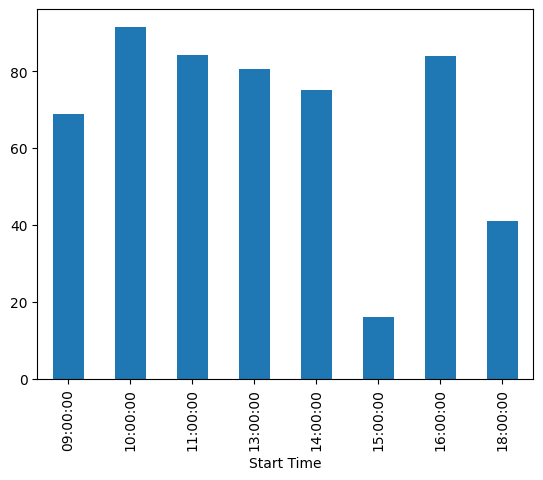

In [64]:
df2.plot.bar()